# File name: Applied Machine Learning
# Date: 10/4/2024


# Lecture: Dr. Debora Elam
# Course: CS379
# Description: This is an implementation of a simple Decision Tree Classifier on the Wine dataset using Gini Impurity. This code provides exploratory data analysis on the Wine dataset, builds and evaluates a decision tree model and makes visual interpretations.


In [1]:
#  libraries
import numpy as np  
import pandas as pd  # data manipulation library
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # visualization library
from sklearn.datasets import load_wine  # import Wine dataset
from sklearn.model_selection import train_test_split  # For Data preparation: Splitting the dataset into training and testing
from sklearn.tree import DecisionTreeClassifier, plot_tree # Generate and plot the Decision Tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model Performance



In [2]:
# # Style for plots

sns.set(style='whitegrid')  # Style for Seaborn plots

# 1. Import the Wine dataset


The code brings the Wine dataset from the sklearn library and reshapes it to Pandas DataFrame to quickly analyse it. The features are saved in this wine_df, and the target variable is appended to this DataFrame. An inverted dictionary is developed to transform numerical target values into easily understandable class names to aid interpretation in further analysis.

In [3]:

wine = load_wine() # Importing Wine dataset from sklearn
# Convert the dataset to a DataFrame : This will hold the features and the target
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
# Add target to the DataFrame
wine_df['target'] = wine.target

# Map target values to class names for readability
wine_class_mapping = {0: 'Class_0', 1: 'Class_1', 2: 'Class_2'}  
wine_df['target'] = wine_df['target'].map(wine_class_mapping)  # Apply the mapping to the target column





# 2. Performing Exploratory Data Analysis (EDA)


Exploratory data analysis is done on the Wine dataset to get a graphical and numerical understanding of the distribution and association of features in this code. It first builds histograms with KDE for ‘alcohol’ and ‘flavonoids,’ which are coloured by wine classes so that it can help understand how these features are different by class. Another part of the exploratory data analysis, the pairplot function, produces a scatterplot matrix of all features with additional insights into the relations between features and the target variable. Using these visualizations, one can check on patterns, distributions, and trends and assess the correlational properties of the dataset in question at the onset of the modelling process.

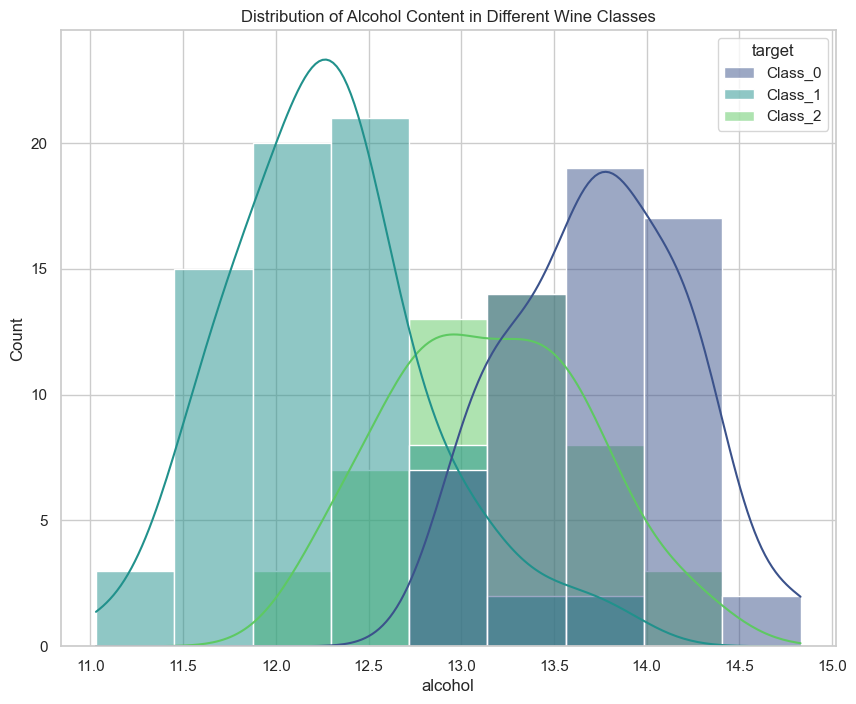

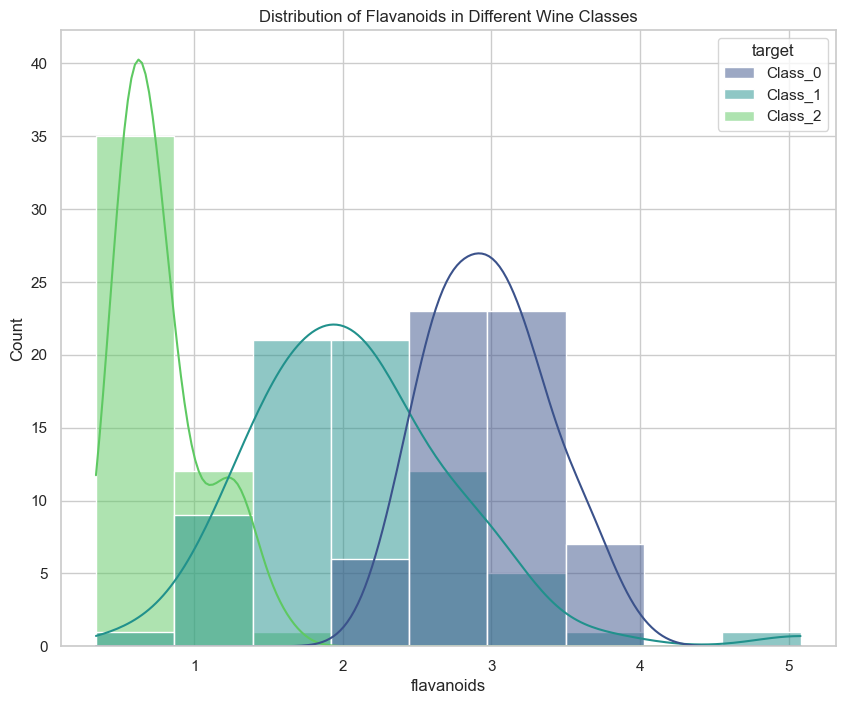

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


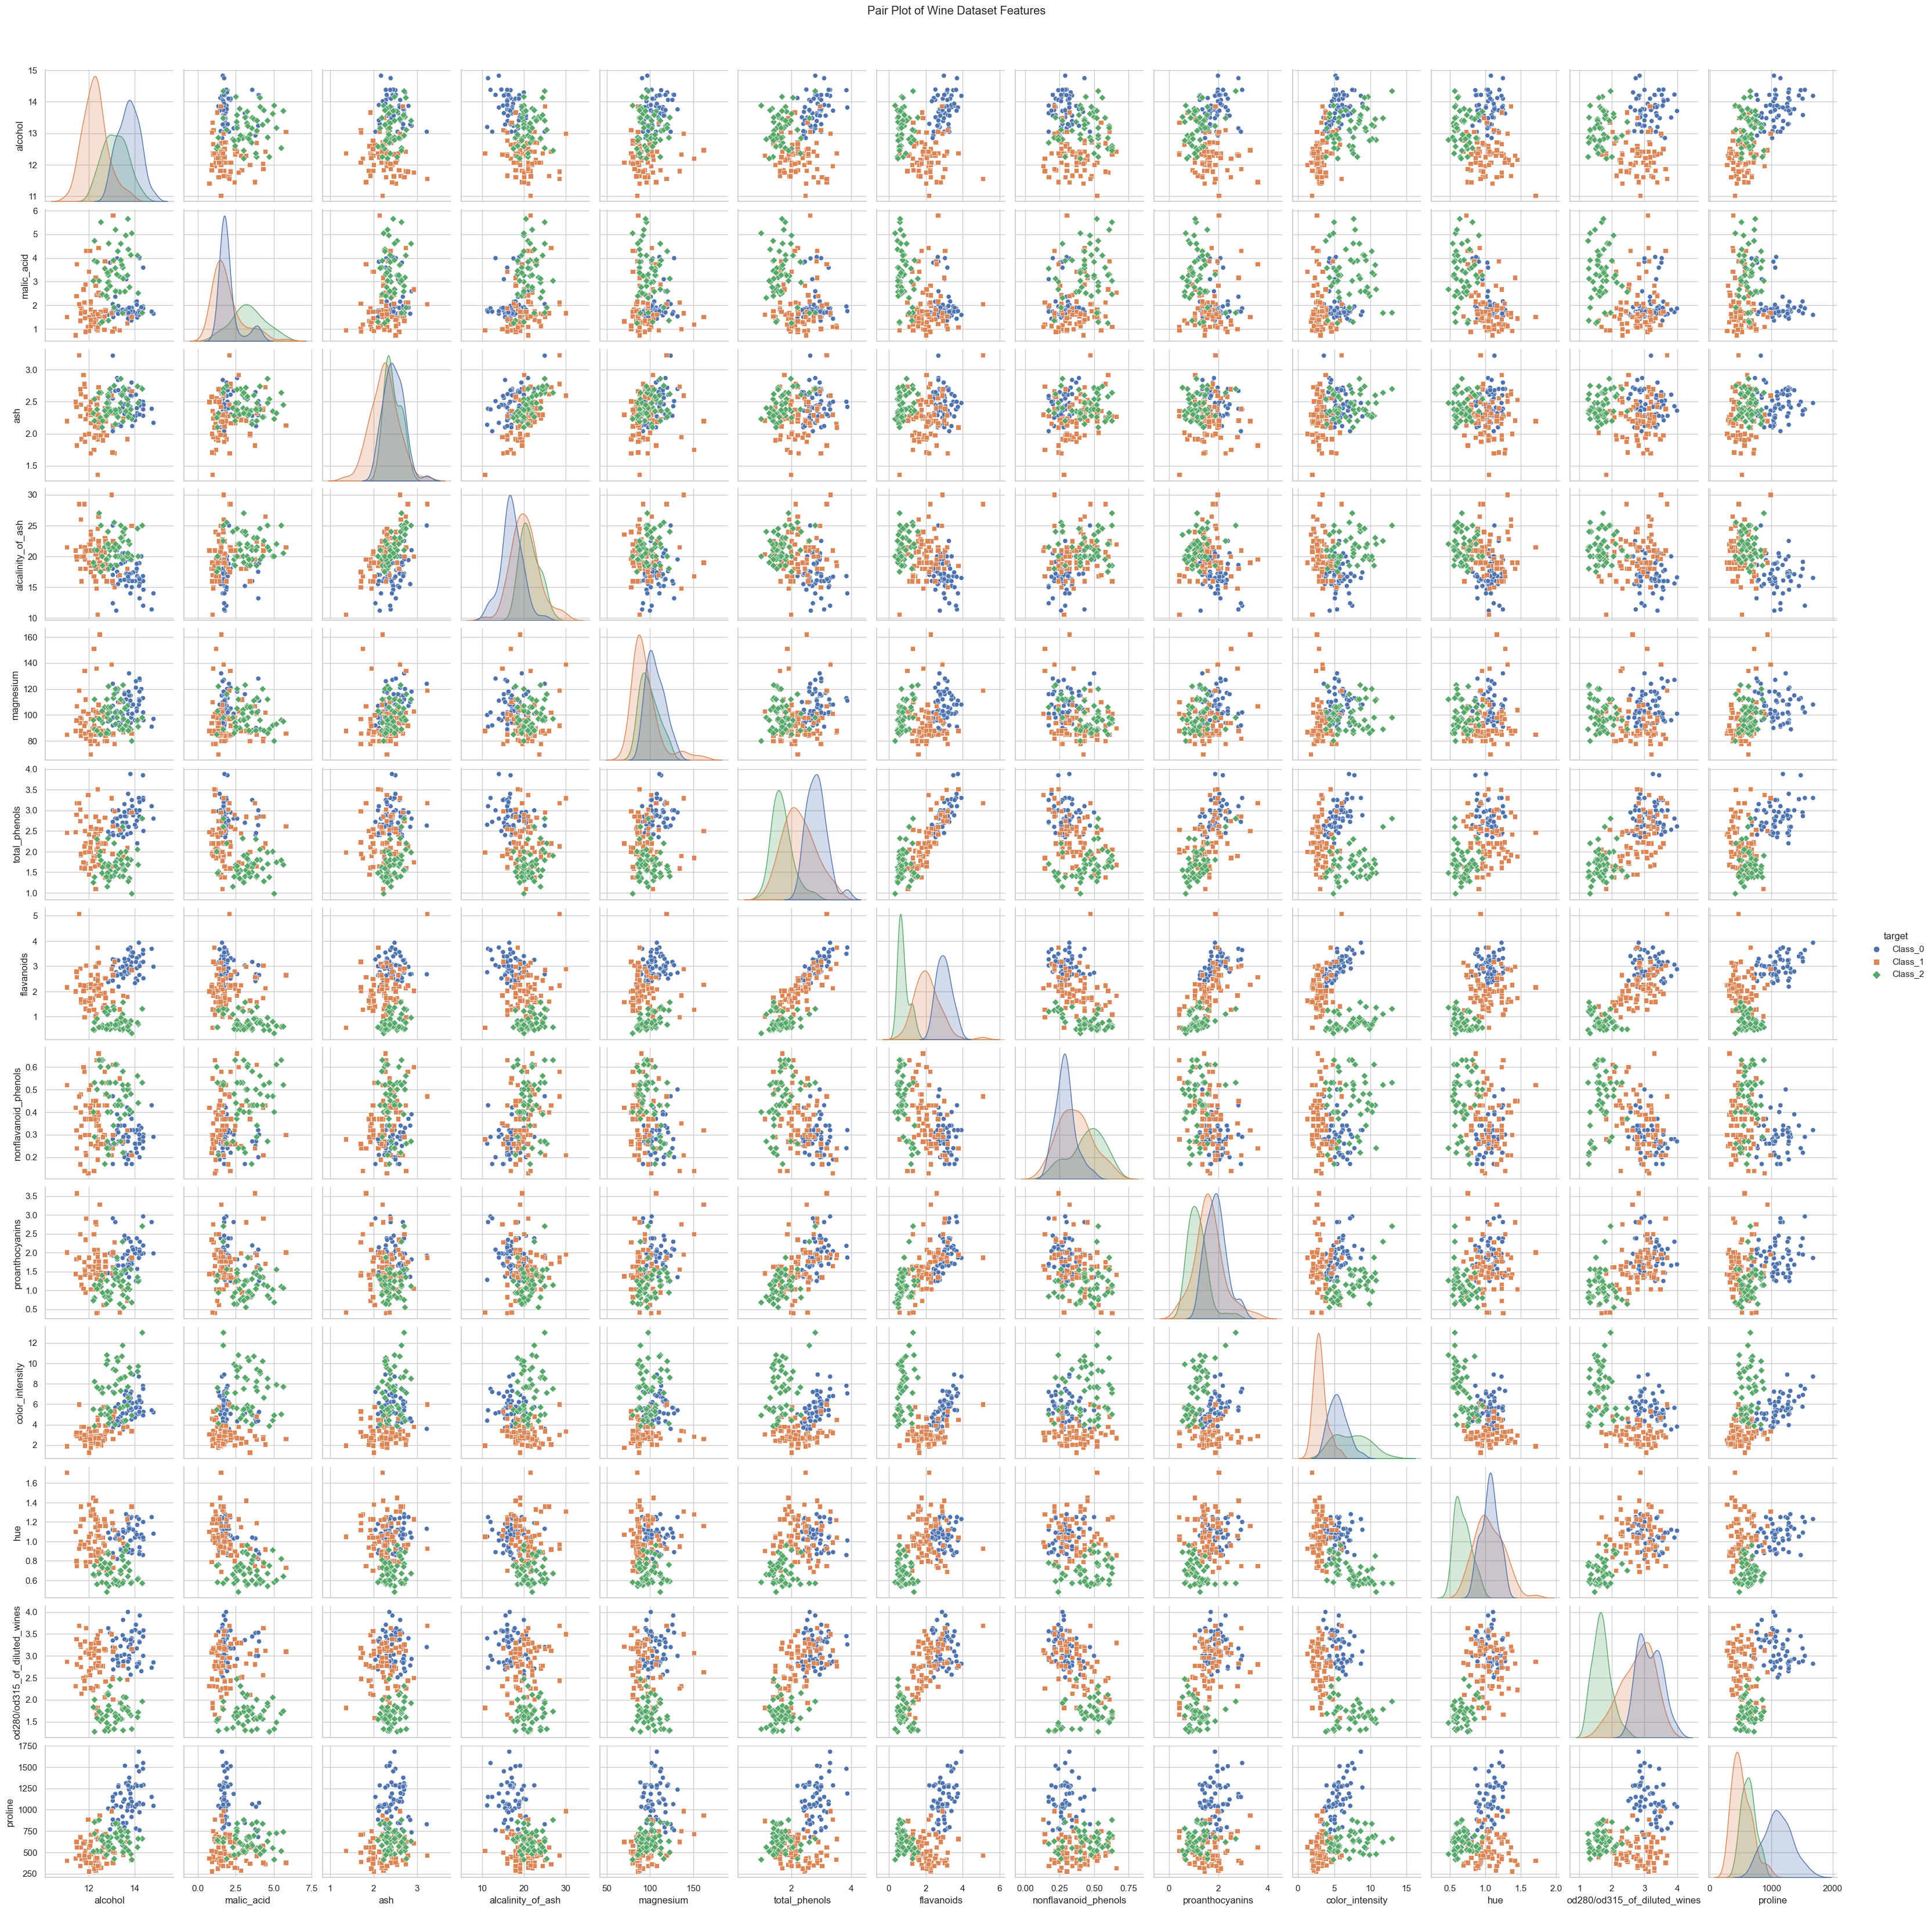

In [4]:
# 2. Performing Exploratory Data Analysis (EDA)
# Visualize the distribution of selected features
plt.figure(figsize=(10, 8))  # Set the figure size to the plot
# Create histogram with KDE for 'alcohol' colored by 'target'
sns.histplot(data=wine_df, x='alcohol', hue='target', kde=True, palette='viridis')
plt.title('Distribution of Alcohol Content in Different Wine Classes')  # Set the title of plot
plt.show()  # Show plot

# Another histogram for 'flavanoids'
plt.figure(figsize=(10, 8))  # Set the figure size to the plot
sns.histplot(data=wine_df, x='flavanoids', hue='target', kde=True, palette='viridis')  # Histogram for 'flavanoids'
plt.title('Distribution of Flavanoids in Different Wine Classes')  # Set the title of the plot
plt.show()  # Display the plot

# 'Pairplot' to visualize feature-feature relationship
sns.pairplot(wine_df, hue='target', markers=["o", "s", "D"])  # Create scatterplot matrix colored by 'target'
plt.suptitle('Pair Plot of Wine Dataset Features', y=1.02)  # Set the title for the pairplot
plt.show()  # Display the pair plot


# 3. Split dataset into training set and test set

The code first splits the Wine dataset into feature and target or dependent variables. It then divides it into the training data sets (70%) and a test data set (30%) to facilitate model analysis.

In [5]:
# 3. Split dataset into training set and test set
X = wine.data  # Features (independent variables)
y = wine.target  # Target labels (dependent variable)
# Split dataset into training set and test set: 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 4. Instantiate and fit  and evaluate the Decision Tree model

At the beginning of the code above, a decision tree model is created with the Gini impurity as the criterion, and the maximum depth is set at 3 for interpretational purposes as well. Gini impurity is a measure of decision trees; it represents the frequency with which a randomly chosen element from the set would be incorrectly labelled if it were randomly labelled according to the distribution of labels in the subset. The aim is to reduce Gini impurity, so the best split is the one that presents the highest reduction of impurity.

It trains the model to the training data set and then tests to the test data set. After training the model, accuracy is computed, a confusion matrix is drawn, and a classification report that gives the precision, recall and f1-score for each class is developed. The results show that the model has a 96% accuracy, meaning that the classification is efficient and performs well for all classes, as portrayed in the classification report metrics.

In [6]:
# 4. Fit Decision Tree with Gini Index in the next cell, Instantiate the Decision Tree model
classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)  # Instantiate classifier
classifier.fit(X_train, y_train)  ### On the obtained training data, make the training of the model



# 5. Predictions on the test set
y_pred = classifier.predict(X_test)  ## Perform the target for the test set


# 6. Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)  # Let us calculate the accuracy of the model
conf_matrix = confusion_matrix(y_test, y_pred)  # Create the confusion matrix
class_report = classification_report(y_test, y_pred, target_names=wine.target_names) # Create the classification report



# Print results
print(f"Model Accuracy: {accuracy * 100:.2f}%")  # Printing the percentage of accuracy
print("Classification Report:\n", class_report)  # Print the classification report



Model Accuracy: 96.30%
Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



# 7. Visualize the Confusion Matrix

A heat map represents the model’s performance, and a confusion matrix is used with the help of the code below. While annotation marks the number of true positives, false positives and false negatives exist. It contains the accuracy of the classification model, making it easier to interpret the results for each wine class.

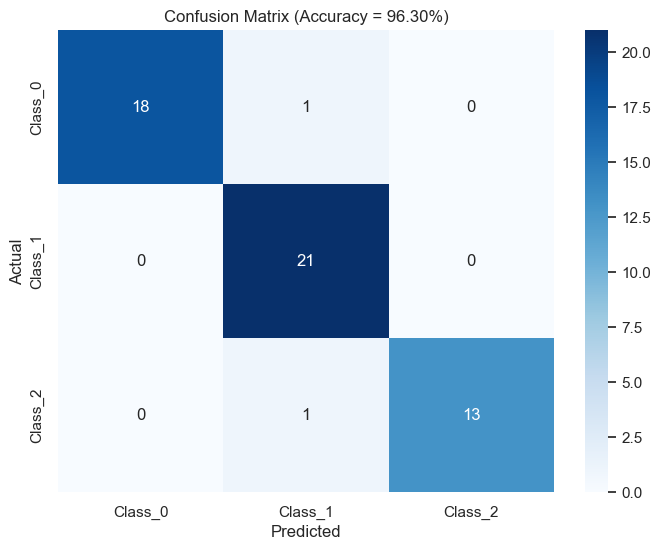

In [7]:

plt.figure(figsize=(8, 6))  # Making figure size for the plot of confusion matrix
# Create a heatmap for the confusion matrix with annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine_class_mapping.values(), yticklabels=wine_class_mapping.values())
plt.title(f'Confusion Matrix (Accuracy = {accuracy * 100:.2f}%)')  # Set the title for the plot
plt.xlabel('Predicted')  # Set x-axis label
plt.ylabel('Actual')  # Set y-axis label
plt.show()  # Display the confusion matrix plot


# 8. Plot the Decision Tree


Plot_tree is used to depict how decisions are made considering the Decision Tree model after it has been trained. The compare function converts class names to a list. Out of all the parameters that the plot features command gives, the plot shows feature splits, class labels, and fill colour, which assist in identifying the structure of the model and its decision engine.

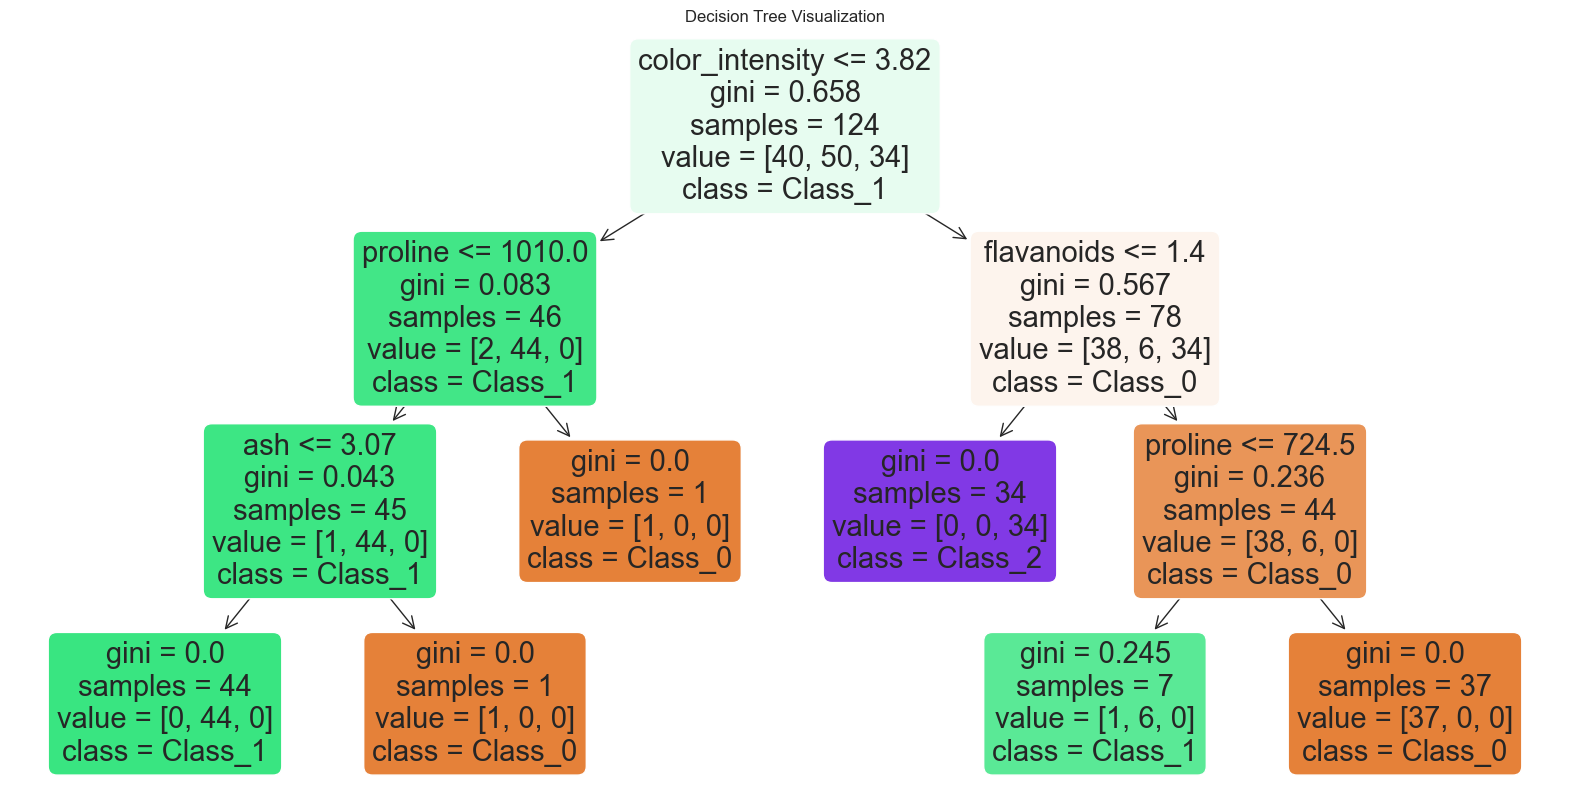

In [9]:

plt.figure(figsize=(20, 10))  # Set the figure size for the decision tree plot

# Convert class_names to a list
class_names_list = list(wine_class_mapping.values())

# Plot the decision tree
plot_tree(classifier, feature_names=wine.feature_names, class_names=class_names_list, filled=True, rounded=True)

# Set the title for the plot
plt.title('Decision Tree Visualization')  
plt.show()  # Display the decision tree plot


# 9. Plot Feature Importance


Using the Decision Tree model, the code provides feature importances that estimate each feature's importance (relevance). The importance is ranked in a data frame for these and plotted in a horizontal bar plot. According to the findings, the three most essential characteristics in wine classification are 'flavonoids' while the characteristics with the most minor importance are 'sulphites'.

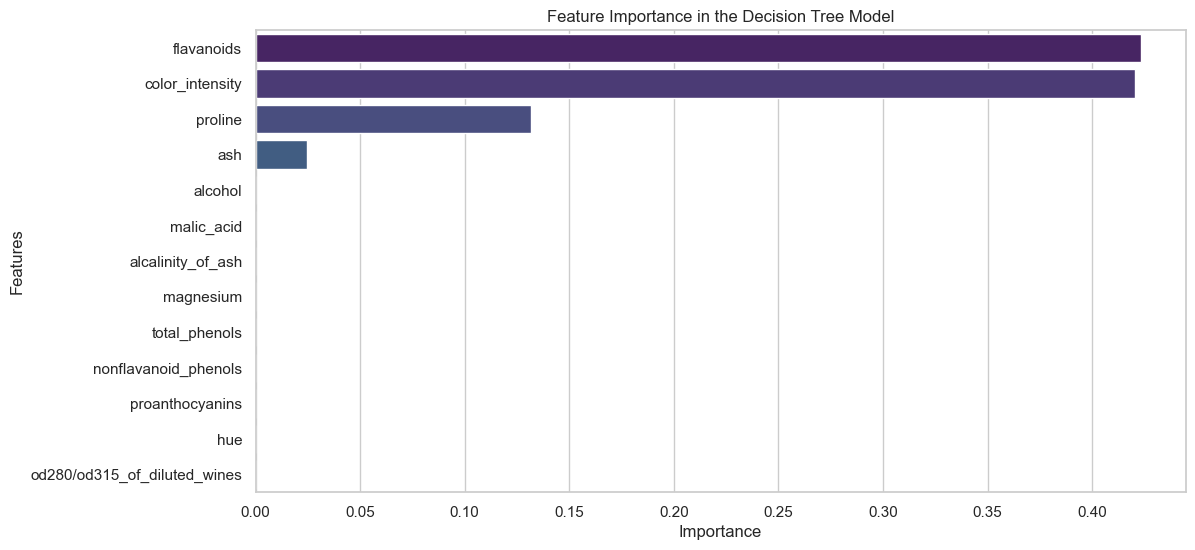

In [10]:
feature_importances = classifier.feature_importances_  # get feature importances from the classifier
features = wine.feature_names  # Get feature names
# Create a Dataframe for feature importance
feature_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})  # Create a DataFrame
feature_df = feature_df.sort_values(by='Importance', ascending=False)  # Sort the Dataframe by importance

# Plot feature importance
plt.figure(figsize=(12, 6))  # Set the figure size for the feature importance plot
sns.barplot(x='Importance', y='Features', data=feature_df, palette='viridis')  # Bar plot for feature importance
plt.title('Feature Importance in the Decision Tree Model')  # Set the title for the plot
plt.show()  # Display the feature importance plot



# 10. Visualize Model Accuracy Using a Bar Plot


Here, I create a basic bar chart to describe the accuracy of the developed model. The plot is intended to give an overview of the Decision Tree model performance; the accuracy value is given as a percentage in the title. The y-axis is from 0 to 1 for ease of clustering.

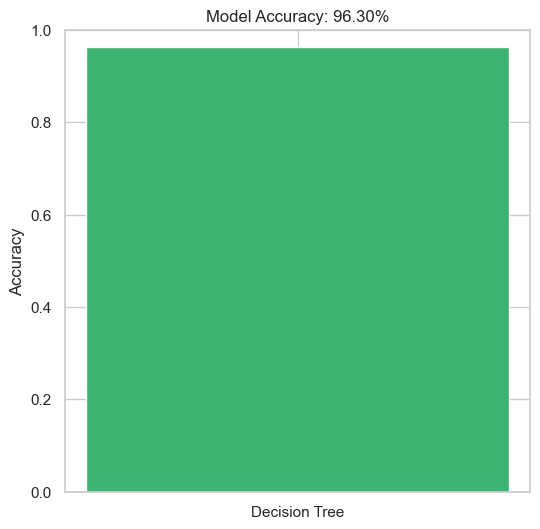

In [11]:
plt.figure(figsize=(6, 6))  # Specify the figure size
plt.bar(['Decision Tree'], [accuracy], color='mediumseagreen') # create a bar plot to represent the accuracy
plt.ylim(0, 1) # make a limit of 0 to 1
plt.ylabel('Accuracy')  # Set y-axis label
plt.title(f'Model Accuracy: {accuracy * 100:.2f}%')  # showing the accuracy on the titlw
plt.show()  # show the plot


# 11. Plot Decision Boundaries for Visualization (Using two features for simplicity)

This code plots the decision boundaries of the trained Decision Tree model, using only Alcohol and Flavanoids as features. It then creates a function to create a mesh grid of these features and outputs the class for each point to visualize the decision boundaries of the model. It highlights the actual training points using bold colours for the boundaries drawn in light colours. The role of the model in determining the wine classes based on these chosen features is established with the help of this visualization.


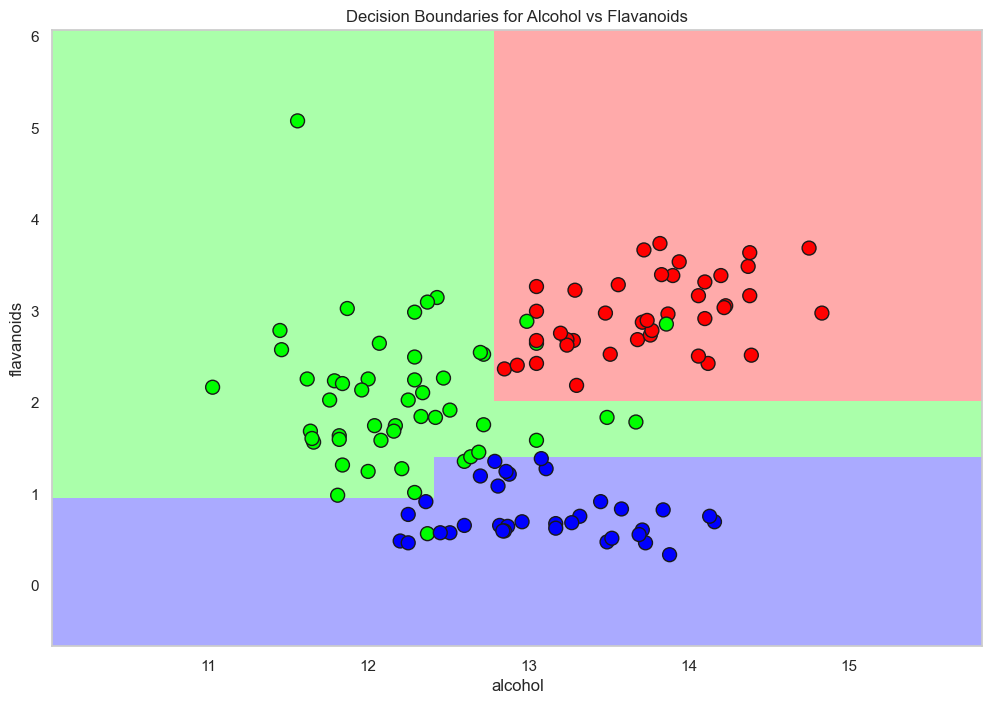

In [12]:
from matplotlib.colors import ListedColormap  # For custom color maps

# Define a function to plot decision boundaries
def plot_decision_boundaries(X, y, model, features, target_names):
    # Choose two features for visualization(Alcohol and Flavanoids)
    X = X[:, [0, 6]]  # Select Alcohol and Flavanoids columns
    model.fit(X, y)  # Fit the model on the selected features

    # Set the limits for the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # X-axis limits
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Y-axis limits

    # Create a mesh grid for the feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))  # Create mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Doing the predictions for every point of the grid.
    Z = Z.reshape(xx.shape)  # Reshape predictions to match grid shape

    # Plotting the decision boundaries
    plt.figure(figsize=(12, 8))  # Setting the figure size for the decision boundary plot
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light colors for the decision boundaries
    cmap_bold = ['#FF0000', '#00FF00', '#0000FF']  # Bold colors for actual points
    
    plt.contourf(xx, yy, Z, cmap=cmap_light) # Fill the contour plot with predicted classes
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=100)  # Scatter plot of training points
    plt.xlabel(features[0])  # Setting x-axis label
    plt.ylabel(features[6])  # Setting y-axis label
    plt.title('Decision Boundaries for Alcohol vs Flavanoids')  # Set the title for the plot
    plt.show()  # Show the Decision boundaries plot

# Plot decision boundaries using the training data
plot_decision_boundaries(X_train, y_train, classifier, wine.feature_names, wine.target_names)



# 12. Calculate and plot precision, recall and F1-score for each class


This code computes orienteering precision, individual wines' recall, and wines as the F1 score for each wine class. Accuracy checks optimistic prediction's recall checks the whole range of instances, and the F1 score is the best measure in case of different class sizes. The results likeness is explored using a data frame and presented by a grouped bar plot to compare these metrics throughout different classes. This kind of assessment is helpful to detect the advantages and limitations of the model under analysis.

In [15]:


from sklearn.metrics import precision_score, recall_score, f1_score
# Precision: Measures the accuracy of the positive predictions
precision = precision_score(y_test, y_pred, average=None)  

# Recall: Measures the ability to find all relevant instances (true positives)
recall = recall_score(y_test, y_pred, average=None)  

# F1 Score: The harmonic average of the precision and recall. Useful when one is dealing with an imbalanced dataset.
f1 = f1_score(y_test, y_pred, average=None)  

# Create a DataFrame to store the calculated metrics for each class
metrics_df = pd.DataFrame({
    'Class': wine.target_names,  # Class names from the dataset
    'Precision': precision,  # Precision scores for each class
    'Recall': recall,  # Recall scores for each class
    'F1-Score': f1  # F1 scores for each class
})




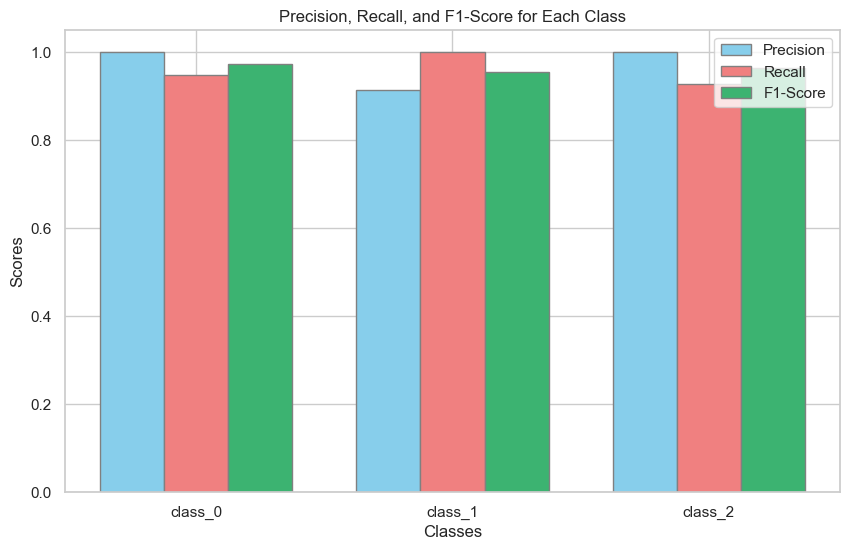

In [16]:
# Plot the precision, recall, and F1-score for each class
# Set up the figure size for plotting
plt.figure(figsize=(10, 6))

# Set the width of each bar in the bar chart
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(metrics_df))  #  precision bars
r2 = [x + bar_width for x in r1]  # recall bars, shifted by bar_width
r3 = [x + bar_width for x in r2]  # F1-score bars, shifted by bar_width

# Create the bar plots for each metric
# Bar for Precision
plt.bar(r1, metrics_df['Precision'], color='skyblue', width=bar_width, edgecolor='grey', label='Precision')

# Bar for Recall
plt.bar(r2, metrics_df['Recall'], color='lightcoral', width=bar_width, edgecolor='grey', label='Recall')

# Bar for F1-Score
plt.bar(r3, metrics_df['F1-Score'], color='mediumseagreen', width=bar_width, edgecolor='grey', label='F1-Score')

# Label the axes
plt.xlabel('Classes')  
plt.ylabel('Scores')  

# Set a title for the plot
plt.title('Precision, Recall, and F1-Score for Each Class')

# Set the x-ticks to correspond with the class names
plt.xticks([r + bar_width for r in range(len(metrics_df))], wine.target_names)

# Add legend to distinguish between metrics
plt.legend()

# Show the plot
plt.show()




This chart shows the precision, recall, and F1-score of classes: class_0, class_1, and class_2. Precision tells how many of the predicted positive instances were positive. Recall is the metric that informs how many positive instances were predicted correctly.

The F1-score is the harmonic mean of precision and recall. Class_0 has the highest precision and F1-score, while class_1 has the lowest recall.